# **Channel E**

In [5]:
# import libraries
import uproot
import numpy as np
import matplotlib.pyplot as plt

import Style as style

from scipy.optimize import curve_fit
from scipy.stats import norm

save_fig = False

In [6]:
# open a root file and make an array of all TH1F within a TList
filename = "../sexaquark/output_sig_parallel/E1.8/E18.root"
file = uproot.open(filename)

histograms = file["Hists/"]
hist_dict = {hist.name: hist for hist in histograms}

In [7]:
def plot(stage_name, particle_name, var_name):
    sets = []
    if particle_name == "AntiSexaquark" or particle_name == "PionPair":
        sets = ["All", "Signal"]
    else:
        sets = ["All", "True", "Secondary", "Signal"]
    plt.figure(figsize=(4 * (1 + len(sets)), 4))

    # part 1: all histograms overlayed
    plt.subplot(1, 1 + len(sets), 1)

    max_y=0
    for set_name, color in zip(sets, style.colors):
        hist_name = f"{stage_name}_{set_name}_{particle_name}_{var_name}"
        values, edges = hist_dict[hist_name].to_numpy()

        label_name = hist_name.replace("AntiLambda", "AL").replace("PionPair", "PP")
        plt.hist(edges[:-1], edges, weights=values, alpha=0.4, color=color, label=label_name)
        if np.max(values) > max_y:
            max_y = np.max(values)

    plt.ylim(top=1.2*max_y)
    plt.legend(fontsize='small')

    # part 2: one plot per histogram
    for i, set_name, color in zip(range(1, 1 + len(sets)), sets, style.colors):
        hist_name = f"{stage_name}_{set_name}_{particle_name}_{var_name}"
        values, edges = hist_dict[hist_name].to_numpy()
        plt.subplot(1, 1 + len(sets), i + 1)

        label_name = hist_name.replace("AntiLambda", "AL").replace("PionPair", "PP")
        plt.hist(edges[:-1], edges, weights=values, alpha=0.4, color=color, label=label_name)

        if np.sum(values) == 0.:
            break

        avg = np.average(edges[:-1], weights=values)
        n_entries = np.sum(values)
        first_bin = np.where(values > 0)[0][0]
        last_bin = np.where(values > 0)[0][-1]
        stats = f"Entries: {n_entries:.0f}\nAverage: {avg:.2f}\nMin. {var_name}: {edges[first_bin]:.2f}\nMax. {var_name}: {edges[last_bin+1]:.2f}"
        plt.hist(edges[:-1], edges, alpha=0., label=stats) # invisible histogram to show stats on the legend

        plt.ylim(top=1.2*np.max(values))

        plt.legend(fontsize='small')

    plt.tight_layout()

    plt.show()

### **Reconstructed Tracks**

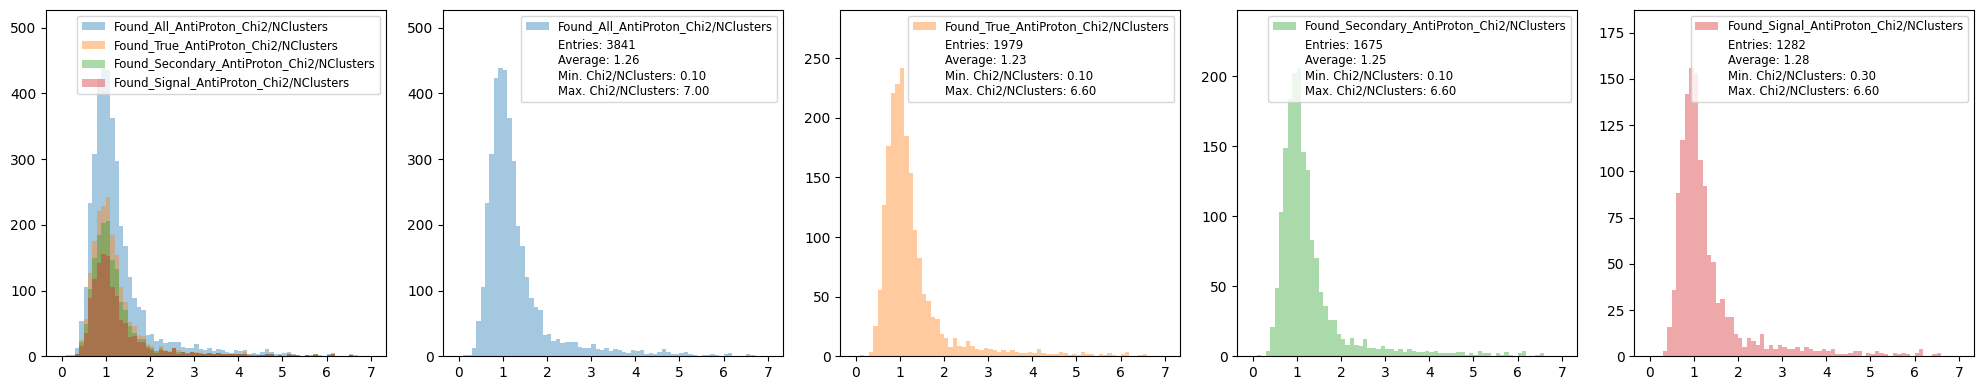

In [9]:
plot("Found", "AntiProton", "Pt")
plot("Found", "AntiProton", "Pz")
plot("Found", "AntiProton", "Eta")
plot("Found", "AntiProton", "DCAwrtPV")
plot("Found", "AntiProton", "NTPCClusters")
plot("Found", "AntiProton", "Chi2/NClusters")
plot("Found", "AntiProton", "NSigmaProton")
plot("Found", "AntiProton", "NSigmaKaon")
plot("Found", "AntiProton", "NSigmaPion")
plot("Found", "AntiProton", "Status")

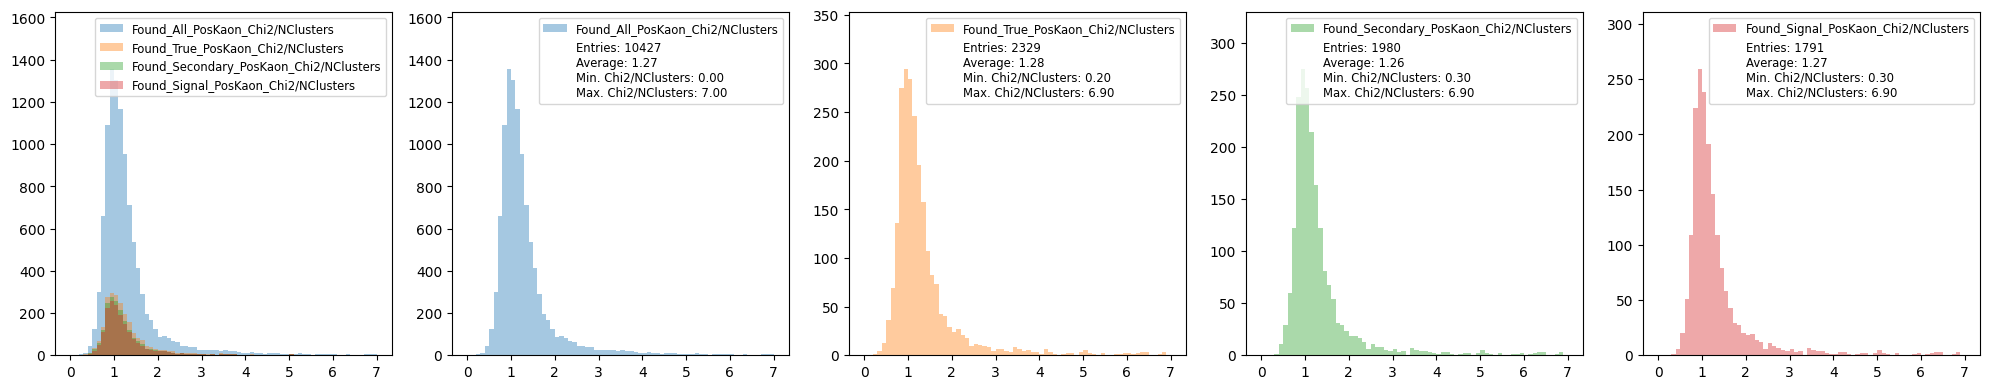

In [10]:
plot("Found", "PosKaon", "Pt")
plot("Found", "PosKaon", "Pz")
plot("Found", "PosKaon", "Eta")
plot("Found", "PosKaon", "DCAwrtPV")
plot("Found", "PosKaon", "NTPCClusters")
plot("Found", "PosKaon", "Chi2/NClusters")
plot("Found", "PosKaon", "NSigmaProton")
plot("Found", "PosKaon", "NSigmaKaon")
plot("Found", "PosKaon", "NSigmaPion")
plot("Found", "PosKaon", "Status")

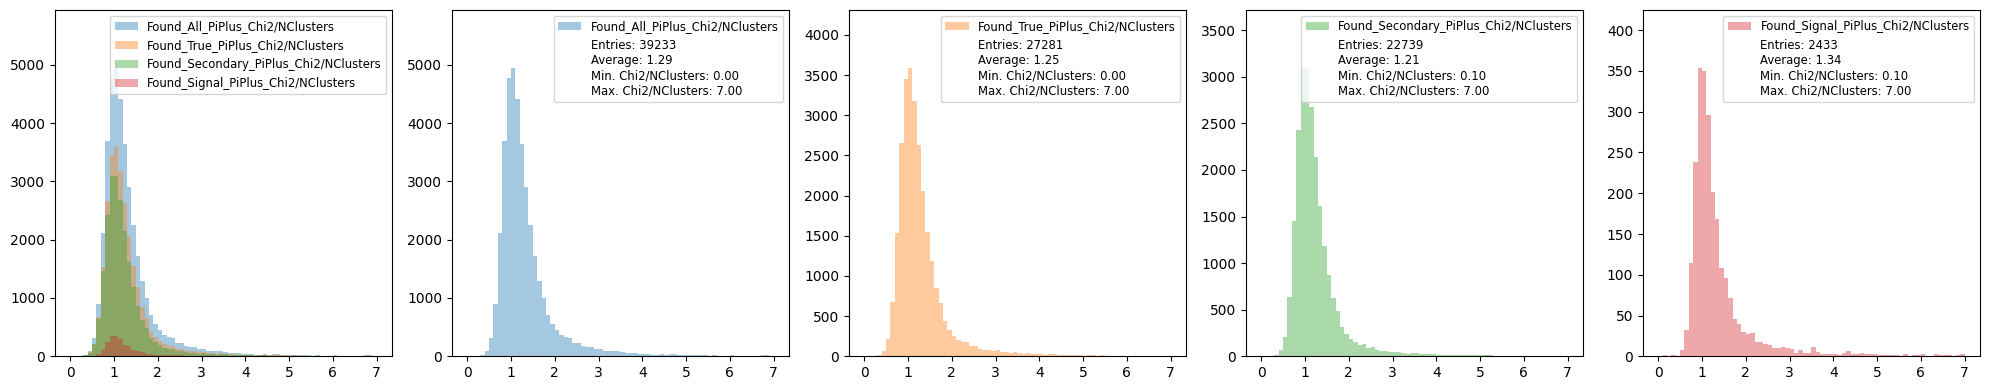

In [11]:
plot("Found", "PiPlus", "Pt")
plot("Found", "PiPlus", "Pz")
plot("Found", "PiPlus", "Eta")
plot("Found", "PiPlus", "DCAwrtPV")
plot("Found", "PiPlus", "NTPCClusters")
plot("Found", "PiPlus", "Chi2/NClusters")
plot("Found", "PiPlus", "NSigmaProton")
plot("Found", "PiPlus", "NSigmaKaon")
plot("Found", "PiPlus", "NSigmaPion")
plot("Found", "PiPlus", "Status")

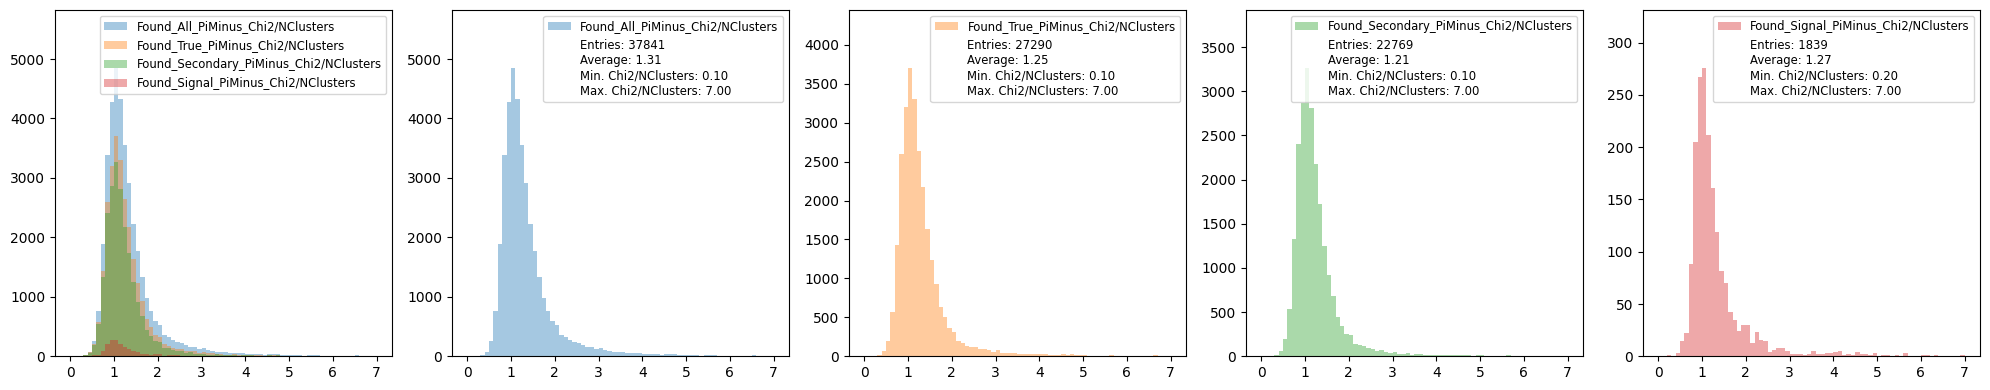

In [12]:
plot("Found", "PiMinus", "Pt")
plot("Found", "PiMinus", "Pz")
plot("Found", "PiMinus", "Eta")
plot("Found", "PiMinus", "DCAwrtPV")
plot("Found", "PiMinus", "NTPCClusters")
plot("Found", "PiMinus", "Chi2/NClusters")
plot("Found", "PiMinus", "NSigmaProton")
plot("Found", "PiMinus", "NSigmaKaon")
plot("Found", "PiMinus", "NSigmaPion")
plot("Found", "PiMinus", "Status")

### V0s

In [ ]:
plot("Found", "AntiLambda", "Mass")
plot("Found", "AntiLambda", "Pt")
# plot("Found", "AntiLambda", "Px")
# plot("Found", "AntiLambda", "Py")
plot("Found", "AntiLambda", "Pz")
# plot("Found", "AntiLambda", "Phi")
plot("Found", "AntiLambda", "Radius")
# plot("Found", "AntiLambda", "Zv")
plot("Found", "AntiLambda", "Eta")
# plot("Found", "AntiLambda", "Rapidity")
plot("Found", "AntiLambda", "DecayLength")
plot("Found", "AntiLambda", "OpeningAngle")
plot("Found", "AntiLambda", "ArmQt")
plot("Found", "AntiLambda", "ArmAlpha")
plot("Found", "AntiLambda", "CPAwrtPV")
plot("Found", "AntiLambda", "DCAwrtPV")
plot("Found", "AntiLambda", "DCAbtwDau")
plot("Found", "AntiLambda", "DCAnegV0")
plot("Found", "AntiLambda", "DCAposV0")
# plot("Found", "AntiLambda", "Chi2")
plot("Found", "AntiLambda", "Chi2ndf")

In [ ]:
plot("Found", "PionPair", "Mass")
plot("Found", "PionPair", "Pt")
# plot("Found", "PionPair", "Px")
# plot("Found", "PionPair", "Py")
plot("Found", "PionPair", "Pz")
# plot("Found", "PionPair", "Phi")
plot("Found", "PionPair", "Radius")
plot("Found", "PionPair", "Zv")
plot("Found", "PionPair", "Eta")
# plot("Found", "PionPair", "Rapidity")
plot("Found", "PionPair", "DecayLength")
plot("Found", "PionPair", "OpeningAngle")
# plot("Found", "PionPair", "ArmQt")
# plot("Found", "PionPair", "ArmAlpha")
plot("Found", "PionPair", "CPAwrtPV")
plot("Found", "PionPair", "DCAwrtPV")
plot("Found", "PionPair", "DCAbtwDau")
plot("Found", "PionPair", "DCAnegV0")
plot("Found", "PionPair", "DCAposV0")
# plot("Found", "PionPair", "Chi2")
plot("Found", "PionPair", "Chi2ndf")

### Anti-Sexaquark Candidates

In [ ]:
plot("Found", "AntiSexaquark", "Mass")
plot("Found", "AntiSexaquark", "Pt")
plot("Found", "AntiSexaquark", "Pz")
plot("Found", "AntiSexaquark", "Radius")
plot("Found", "AntiSexaquark", "Zv")
plot("Found", "AntiSexaquark", "DecayLength")
plot("Found", "AntiSexaquark", "Eta")
plot("Found", "AntiSexaquark", "Rapidity")
plot("Found", "AntiSexaquark", "CPAwrtPV")
plot("Found", "AntiSexaquark", "DCAwrtPV")
plot("Found", "AntiSexaquark", "DCAv0SV")
plot("Found", "AntiSexaquark", "DCAv0negSV")
plot("Found", "AntiSexaquark", "DCAv0posSV")
plot("Found", "AntiSexaquark", "DCApkSV")
plot("Found", "AntiSexaquark", "DCApmSV")
plot("Found", "AntiSexaquark", "DCAppSV")
plot("Found", "AntiSexaquark", "DCAv0pk")
plot("Found", "AntiSexaquark", "DCAv0pm")
plot("Found", "AntiSexaquark", "DCAv0pp")
plot("Found", "AntiSexaquark", "DCApkpm")
plot("Found", "AntiSexaquark", "DCApkpp")
plot("Found", "AntiSexaquark", "Chi2ndf")